# Exercise Set 1
## Title
### Scientific Computing
Nitai Nijholt (12709018)

Pablo Rodriguez Alves (15310191)

In [7]:
from math import erfc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## 1. Vibrating string

### A. Discretize the wave equation
And write it in a form suitable for implementing in a computer program

In [94]:
def runge_kutta(func, y0, h, timesteps):
    """Runge Kutta 4th order implementation"""
    time_array = np.arange(0, timesteps*h, step=h)
    y = np.zeros(len(time_array))
    y[0] = y0
    for i in range(1, len(time_array)):
        k1 = func(y[i-1])
        k2 = func(y[i-1] + 0.5*h*k1)
        k3 = func(y[i-1] + 0.5*h*k2)
        k4 = func(y[i-1] + h*k3)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return time_array, y

In [95]:
def create_2d_meshgrid(L = 1.0, T = 1.0, Nx = 100,  Nt = 100):
    """Creating 2d meshgrid for numerically solving wave PDE'"""

    # Calculating the stepsize, exclusing 1 point
    delta_x = L / (Nx - 1)
    delta_t = T / (Nt - 1)

    # Creating space and time arrays
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)

    # Combining space and time arrays into a 2d meshgrid
    X, T = np.meshgrid(x, t, indexing='ij')
    return X, T, delta_x, delta_t

In [4]:
def initial_condition(u):
    
    return np.sin(np.pi * x)

In [5]:
def u_space(u, x_index, t_index, c, dx):
    """
    Compute the spatial update component for the wave equation.
    
    Parameters:
    - u: 2D array of u values
    - x_index: Index corresponding to the spatial position
    - t_index: Index corresponding to the time step
    - c: Wave speed
    - dx: Spatial step size
    
    Returns:
    - The spatial update component for u at the given index.
    """
    return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)

In [6]:
def update_wave(u, c, dx, dt, Nx, Nt):
    """
    Update the wave function u for all spatial points and for the next time step, using u_space for spatial updates.
    
    Parameters:
    - u: 2D array of u values, shape (Nx, Nt)
    - c: Wave speed
    - dx: Spatial step size
    - dt: Temporal step size
    - Nx: Number of spatial points
    - Nt: Number of time points
    """
    for t_index in range(0, Nt-1):  # Iterate through time steps
        for x_index in range(1, Nx-1):  # Iterate through spatial points, excluding boundaries
            # Calculate the spatial term using u_space
            spatial_term = u_space(u, x_index, t_index, c, dx)
            
            # Apply the update rule, incorporating the spatial term correctly
            if t_index == 0:
                # Handle the first time step with a specific aproach yet to be determined..
                pass
            else:
                # General update rule for subsequent time steps
                u[x_index, t_index+1] = 2*u[x_index, t_index] - u[x_index, t_index-1] + spatial_term * dt**2
    return u

C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\1161476035.py:15: RuntimeWarning: overflow encountered in multiply
  return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\4060189576.py:24: RuntimeWarning: invalid value encountered in double_scalars
  u[x_index, t_index+1] = 2*u[x_index, t_index] - u[x_index, t_index-1] + spatial_term * dt**2
C:\Users\Pablo\AppData\Local\Temp\ipykernel_9304\1161476035.py:15: RuntimeWarning: invalid value encountered in double_scalars
  return (c**2) * (u[x_index + 1, t_index] - 2*u[x_index, t_index] + u[x_index - 1, t_index]) / (dx**2)
c:\Python310\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1

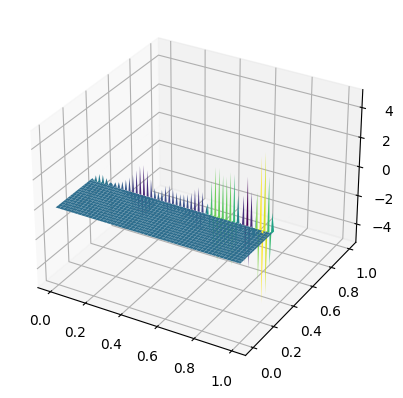

In [35]:
# Simulating


# Step 1: Create the meshgrid for initialization & set c
L, T, Nx, Nt = 1.0, 1.0, 100, 100
X, T_mesh, dx, dt = create_2d_meshgrid(L, T, Nx, Nt)
c = 100000


# Step 2: Initialize u based on X (and possibly T_mesh for non-uniform initial conditions)
u = np.zeros((Nx, Nt))
u[:, 0] = np.sin(np.pi * X[:, 0]) 


# Step 3: Update wave
update_wave(u, c, dx, dt, Nx, Nt)

# Step 4: Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, T_plot = np.meshgrid(np.linspace(0, L, Nx), np.linspace(0, T, Nt))
ax.plot_surface(X, T_plot, u.T, cmap='viridis')  # Note: u.T for correct orientation
plt.show()

### B. Implement time stepping
And determine the time development of the string
And plot the results at several times in the same figure

### C. Make an animated plot of the time development

## 2. The Time Dependent Diffusion Equation

### D. Determine the equation to use at the boundaries of the domain.
Clearly show the ranges of the indices of the grid. A figure is extremely helpful for figuring this out.

In [70]:
def is_solution_stable(D,dt,dx):
    print((4*dt*D)/(dx**2))
    return (4*dt*D)/(dx**2) <= 1

def is_point_in_bounds(c,i,j):
    imax,jmax = c.shape
    return bool(i >= 0 and i < imax and j >= 0 and j < jmax)

def get_neighboors(c,i,j,N):
    # Get neighboors if possible
    # Later on additional conditions will be added here for sinks and so on...

    # TODO: Connect values in columns!!!

    if j==0:
        # Left column
        # value for j-1 is now the last column (j==N-1)!
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,N-1]
    elif j==(N-1):
        # Right column
        # Value for j+1 is now the first column (j=0)
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,0]
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0
    else:
        c1 = c[i+1,j] if is_point_in_bounds(c,i+1,j) else 0
        c2 = c[i-1,j] if is_point_in_bounds(c,i-1,j) else 0
        c3 = c[i,j+1] if is_point_in_bounds(c,i,j+1) else 0
        c4 = c[i,j-1] if is_point_in_bounds(c,i,j-1) else 0

    return c1,c2,c3,c4

def start_grid(N):
    c = np.zeros((N,N))
    
    # Left column
    c[:,0] = 0

    # Right column same as left
    #c[:,N-1] = c[:,0]

    # Top row
    c[0,:] = 1

    # Bottom row
    #c[N-1,:] = 0
    return c

def update(c,dx,dt,D,N):
    # Make a copy to avoid overwriting data early!
    c_k = c.copy()
    
    # Go over every point
    for i,j in np.ndindex(c.shape):
        # Boundary cases: top row, right column and bottom row
        if i==0:
            # Top row
            c_k[i,j] = 1 
        elif i==(N-1):
            # Bottom row          
            c_k[i,j] = 0
        else:
            # Other cases
            # Connected columns dealt within get_neighboors
            c1,c2,c3,c4 = get_neighboors(c_k,i,j,N)
            c[i,j] = c_k[i,j] + (dt*D)*(c1+c2+c3+c4-4*c_k[i,j])/(dx**2)
    return c


def plot_opinion_grid_evolution(c_sim, interval=250, name='sim.gif'):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(6, 6), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        #plt.title('Timestep:',t)
        #plt.clim(0,1)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)


    writergif = animation.PillowWriter(fps=30)
    anim.save(name, dpi=300, writer=writergif)





In [71]:
# Define global parameters
XMAX,YMAX = 1,1
N = 50
D = 1
TIME = 1
dt = 0.00005 #0.0005 #  0.001 # 
dx = 1/N

# Ensure our parameters create a stable solution
assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,TIME,int(TIME/dt))

# Create matrices for the simulation
c_sim = np.zeros((t_vector.size,N,N))

0.5


In [4]:
# Run the simulation
for t in range(int(TIME/dt)):
    c = update(c,dx,dt,D,N)
    c_sim[t,:,:] = c

In [5]:
# Save data to file
# WARNING: MAY TAKE LOTS OF SPACE
np.save('c_sim.npy',c_sim)

In [18]:
# Load file
c_sim = np.load('c_sim.npy')

### E. Test the correctness of your simulation.
Compare to the analytic solutions, plot c(y) for different times.

In [72]:
def c_analytical(y,t,D,sum_points):
    # Update all terms at once with formula, using sum_points terms for the sum and return the sum
    terms = [erfc((1-y+2*i)/(2*np.sqrt(D*t)))-erfc((1+y+2*i)/(2*np.sqrt(D*t))) for i in range(sum_points)]
    return np.sum(terms)

In [9]:
# Select time points of interest
times = [0.001,0.01,0.1,1]

In [40]:
# Compute analytical solution
cs_anals = np.zeros((len(times),N))
# Y axis for the analytical solution
ys = np.linspace(0,1,N)

# Terms to use in the infinite sum of the analytical solution
sum_points = 50 

for i in range(len(times)):
    time = times[i]
    cs_anals[i,:] = [c_analytical(y,time,D,sum_points) for y in ys]

In [26]:
# Define a function to get the index of the desired times of the simulation
def get_index(time,dt):
    return int(time/dt)-1

# Save them to the array
cs_sims = np.zeros((len(times),N,N))

# Retrieve the values at the right times
cs_sims[0,:,:] = c_sim[get_index(0.001,dt),:,:]
cs_sims[1,:,:] = c_sim[get_index(0.01,dt),:,:]
cs_sims[2,:,:] = c_sim[get_index(0.1,dt),:,:]
cs_sims[3,:,:] = c_sim[get_index(1,dt),:,:]

NameError: name 'c_sim' is not defined

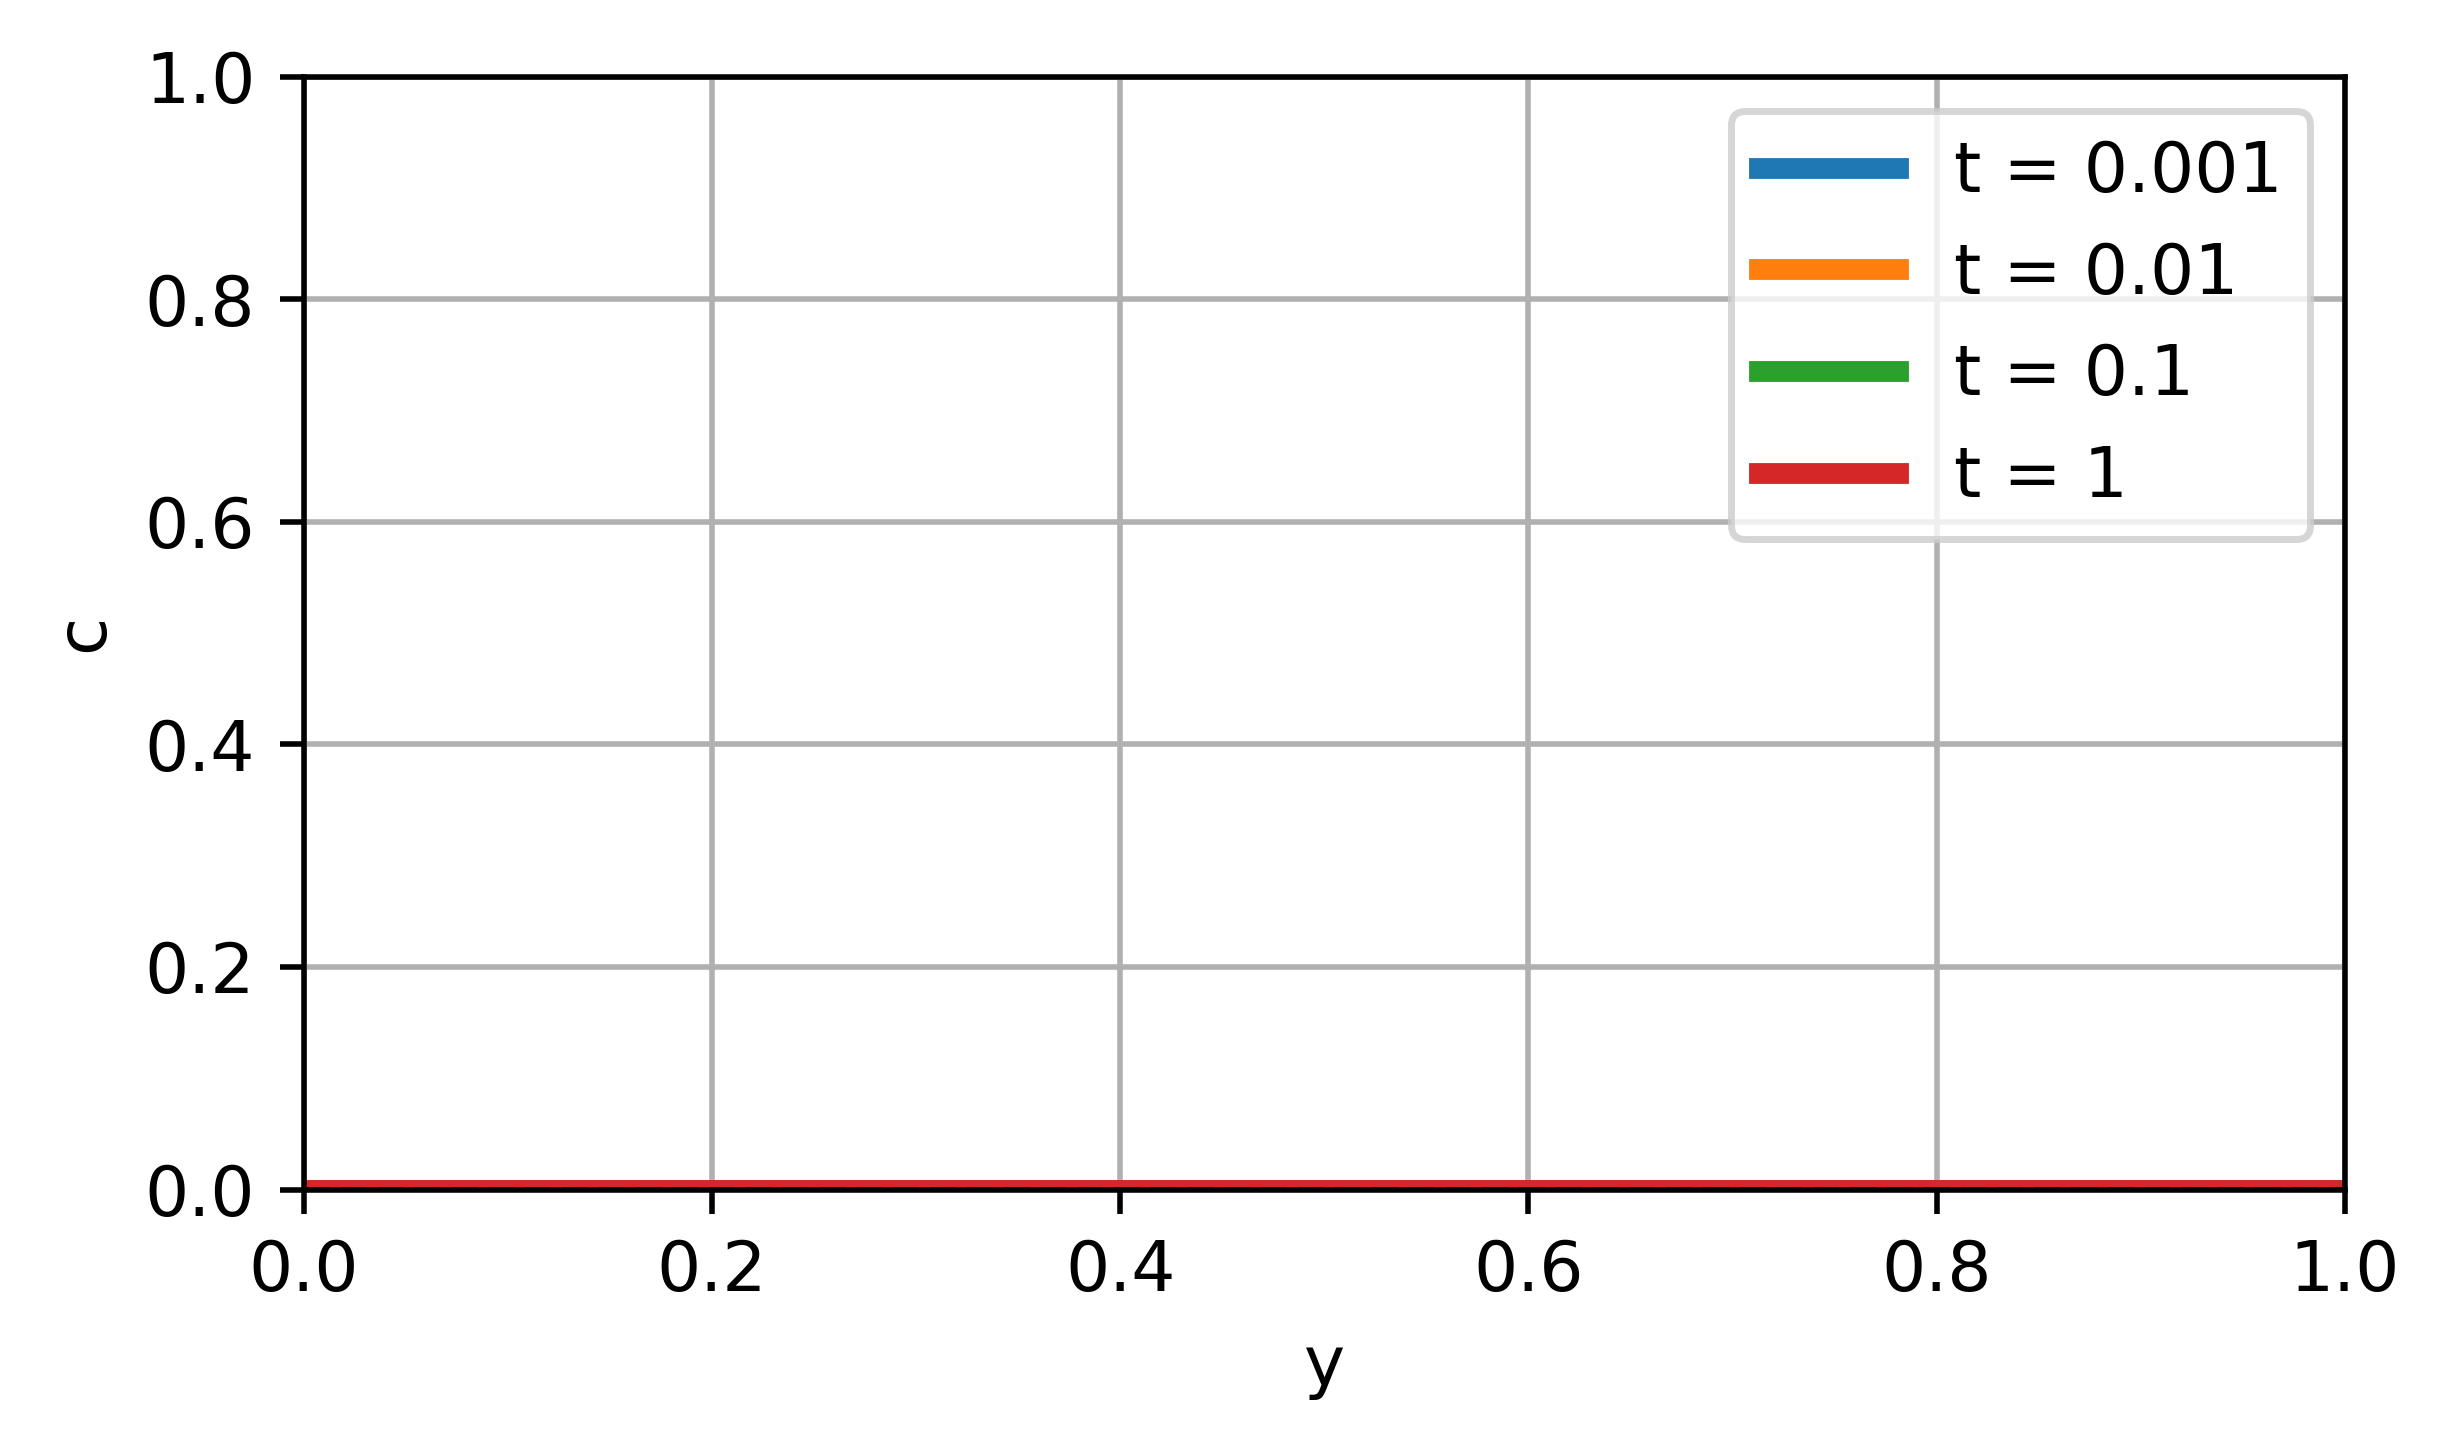

In [37]:
# Repliate Figure 2 of the assignment
plt.figure(figsize=(5,3),dpi=500)

# For all times of interest
for i in range(len(times)):
    # Simulation
    plt.plot(ys,cs_sims[i,::-1,int(N/2)],linestyle='-',label='t = '+str(times[i]),lw=3)
    
    # Analytical solution
    plt.plot(ys,cs_anals[i,:],linestyle='--',color='black',lw=1)

# Aesthetics
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y')
plt.ylabel('c')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### F. Plot the results
Show the 2D domain, with a color representing the concentration at each points

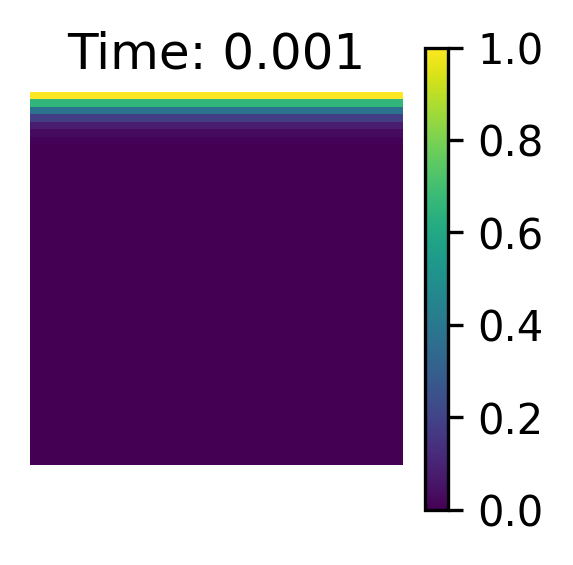

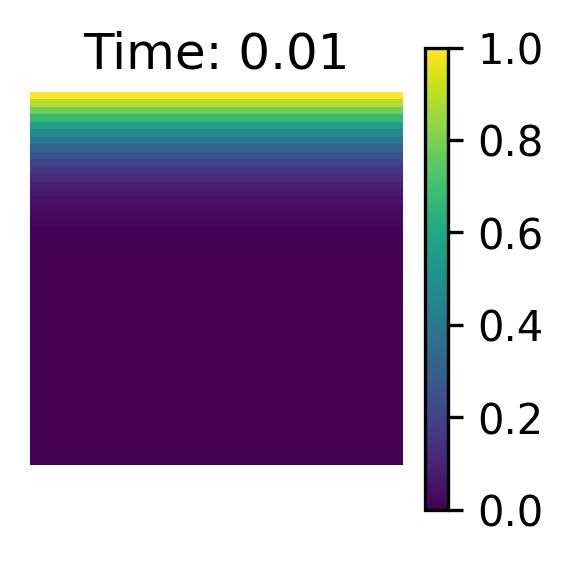

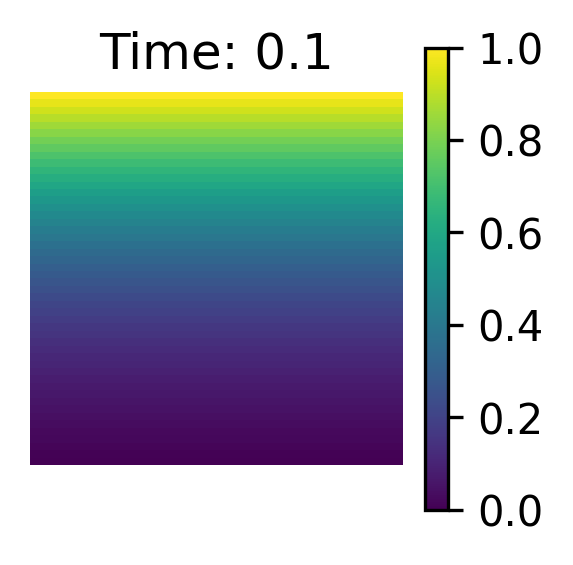

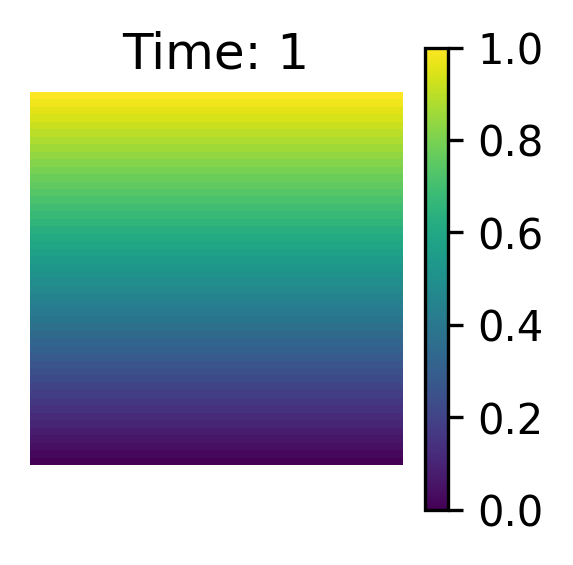

In [13]:
# Get system at desired times
for i in range(len(times)):
    time = times[i]
    sim = cs_sims[i,:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1)
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: '+str(time))
    plt.colorbar()
    

### G. Make an animated plot until equilibrium

In [19]:
def plot_opinion_grid_evolution_fix(c_sim, interval=250):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(3, 3), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t,:,:], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)

    #writergif = animation.PillowWriter(fps=10)
    #anim.save(name, dpi=300, writer=writergif)
    writer = animation.FFMpegWriter(fps=10)
    anim.save('demo.mp4', writer = writer)

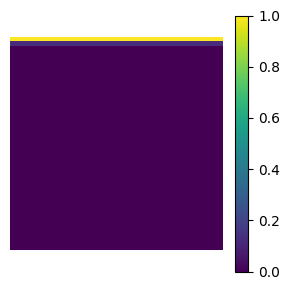

In [22]:
# Monday 19/2 - try to export to mp4 instead
# This line should be enough!
plot_opinion_grid_evolution_fix(c_sim, interval=25)

In [12]:
#c_sim[::2,:,:].shape

# Take one out of every 2 timeseteps for the animation
c_sim_reduced = c_sim[::50,:,:]


In [13]:
# As many samples as timesteps in the simulation
frames = c_sim_reduced.shape[0]

print(frames)

400


In [14]:
fig, ax = plt.subplots()

def update(frame):
    # Update data stored
    data = c_sim_reduced[frame,:,:]
    plt.imshow(data, vmin=0, vmax=1)
    #plt.colorbar()
    # Update plot
    return plt


ani = animation.FuncAnimation(fig=fig,func=update,frames=frames,interval=30)

writergif = animation.PillowWriter(fps=120)

#ani.save('test.mp4', dpi=300, writer='ffmpeg')

ani.save('test.gif', dpi=300, writer=writergif)

In [ ]:
fig, ax = plt.subplots()

def update(frame):
    # Update data stored
    data = c_sim_reduced[frame,:,:]
    plt.imshow(data, vmin=0, vmax=1)
    #plt.colorbar()
    # Update plot
    return plt


ani = animation.FuncAnimation(fig=fig,func=update,frames=frames,interval=30)

#writergif = animation.PillowWriter(fps=120)

ani.save('test.mp4', dpi=300, writer='ffmpeg')

In [11]:
c_sim.shape

(20000, 50, 50)

In [13]:
# Animation (saved as sim.gif, takes some time)
# Warning this code breaks the system!
# Changed the call from c_sim to c_sim[::,:,:]

plot_opinion_grid_evolution_fix(c_sim[::,:,:], interval=10, name='G_animation.gif')

## 1.3 Time Independent ...

### H. Implement the Jacobi iteration, the Gauss-Seidel method and SOR.
Try N= 50. Test the methods by comparing the result to the analytical result in eq.5

In [73]:
# Functions go here
def update_jacobi(c,N):
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # Same as before
        if i==0:
            c[i,j] = 1
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,c2,c3,c4 = get_neighboors(c_k,i,j,N)
            c[i,j] = (1/4)*(c1+c2+c3+c4)
    return c


def update_sor(c,N,w):
    # TODO: Check if this is correct
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # Same as before
        if i==0:
            c[i,j] = 1
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,_,c3,_ = get_neighboors(c_k,i,j,N)
            # Values at i-1 and j-1 are used as soon as they are calculated
            # So we take them from c already!
            _,c2,_,c4 = get_neighboors(c,i,j,N)
            c[i,j] = (w/4)*(c1+c2+c3+c4) + (1-w)*c_k[i,j]
    return c

def update_gauss(c,N):
    # Just call update_sor with w=1
    return update_sor(c,N,w=1)

In [93]:
XMAX,YMAX = 1,1
N = 50 # Must be 50 because of the assignment
MAX_TIME = 3 # Max time we allow to run

optimal_w = 2/(1+np.sin(np.pi/(N+1)))
W = optimal_w

# Ensure our parameters create a stable solution
#assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,MAX_TIME,int(MAX_TIME/dt))

# Create matrices for the simulations
c_sim_jacobi = np.zeros((t_vector.size,N,N))
c_sim_gaussi = np.zeros((t_vector.size,N,N))
c_sim_succor = np.zeros((t_vector.size,N,N))

# Test functions here

In [94]:
# Jacobi
for t in range(int(MAX_TIME/dt)):
    c = update_jacobi(c,N)
    c_sim_jacobi[t,:,:] = c

In [95]:
# Gauss
c = start_grid(N)
for t in range(int(MAX_TIME/dt)):
    c = update_gauss(c,N)
    c_sim_gaussi[t,:,:] = c

In [96]:
# SOR
c = start_grid(N)
for t in range(int(MAX_TIME/dt)):
    c = update_sor(c,N,w=W)
    c_sim_succor[t,:,:] = c

In [ ]:
# plot_opinion_grid_evolution_fix(c_sim_jacobi, interval=10, name='G_animation.gif')

In [97]:
np.save('c_sim_jacobi.npy',c_sim_jacobi)
np.save('c_sim_gaussi.npy',c_sim_gaussi)
np.save('c_sim_succor.npy',c_sim_succor)

In [98]:
c_sim_jacobi = np.load('c_sim_jacobi.npy')
c_sim_gaussi = np.load('c_sim_gaussi.npy')
c_sim_succor = np.load('c_sim_succor.npy')

In [83]:
def plot_opinion_grid_evolution_fix(c_sim, interval=250,name='video.mp4'):
    """
    # Ask the teacher on Wednesday
    """
    plt.figure(figsize=(3, 3), layout='tight')

    def update(t):
        plt.clf()
        plt.imshow(c_sim[t,:,:], vmin=0, vmax=1)
        plt.axis(False)
        plt.grid(True)
        plt.colorbar()
        return plt

    anim = animation.FuncAnimation(plt.gcf(), update, frames=range(
            0, c_sim.shape[0]), interval=interval)

    #writergif = animation.PillowWriter(fps=10)
    #anim.save(name, dpi=300, writer=writergif)
    writer = animation.FFMpegWriter(fps=10)
    anim.save(name, writer = writer)

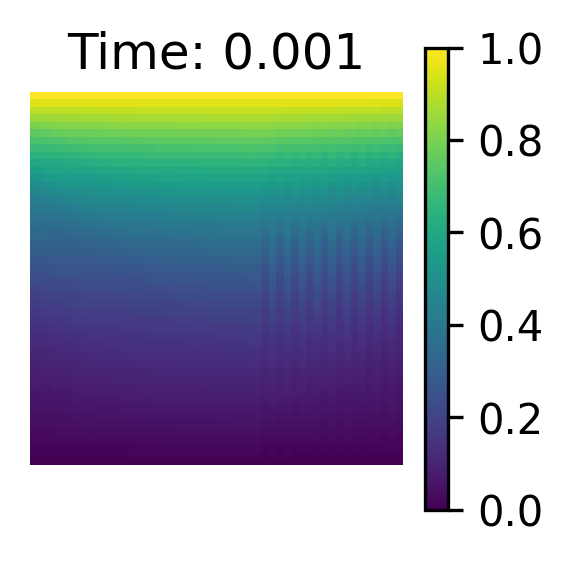

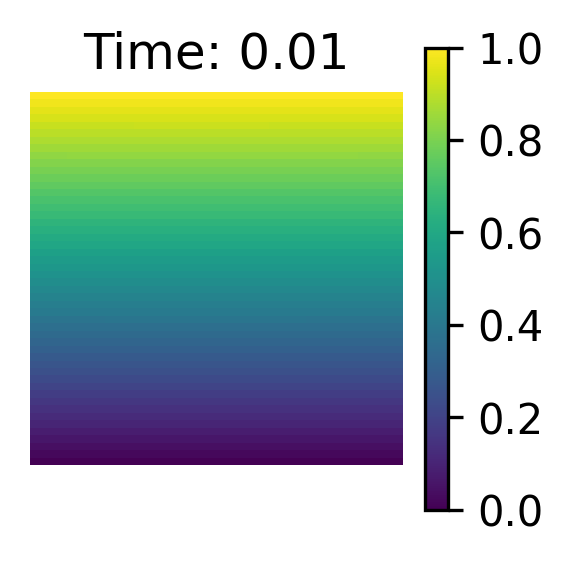

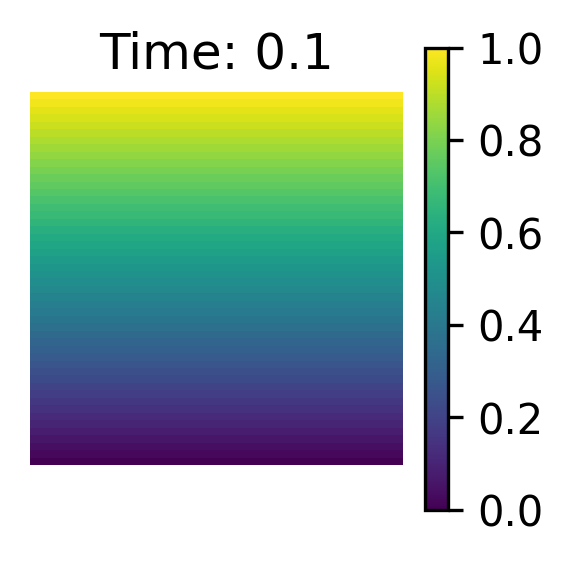

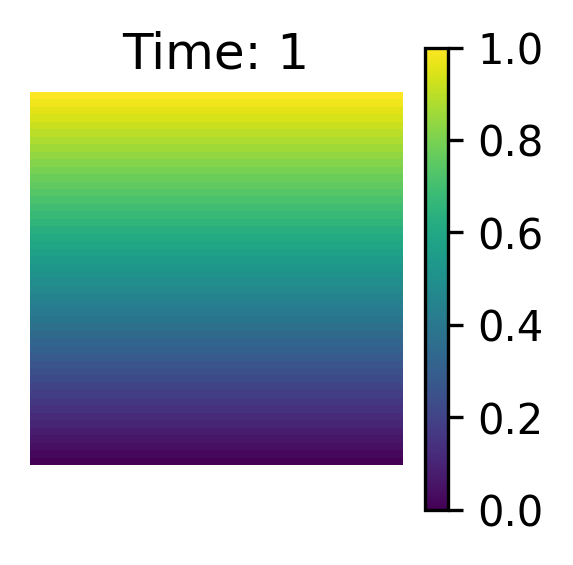

In [99]:
# Plot graph at certain times to check it is ok
times = [0.001,0.01,0.1,1]

# Get system at desired times
for i in range(len(times)):
    time = times[i]
    sim = c_sim_succor[get_index(time,dt),:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1)
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: '+str(time))
    plt.colorbar()
    

Plot against analytical

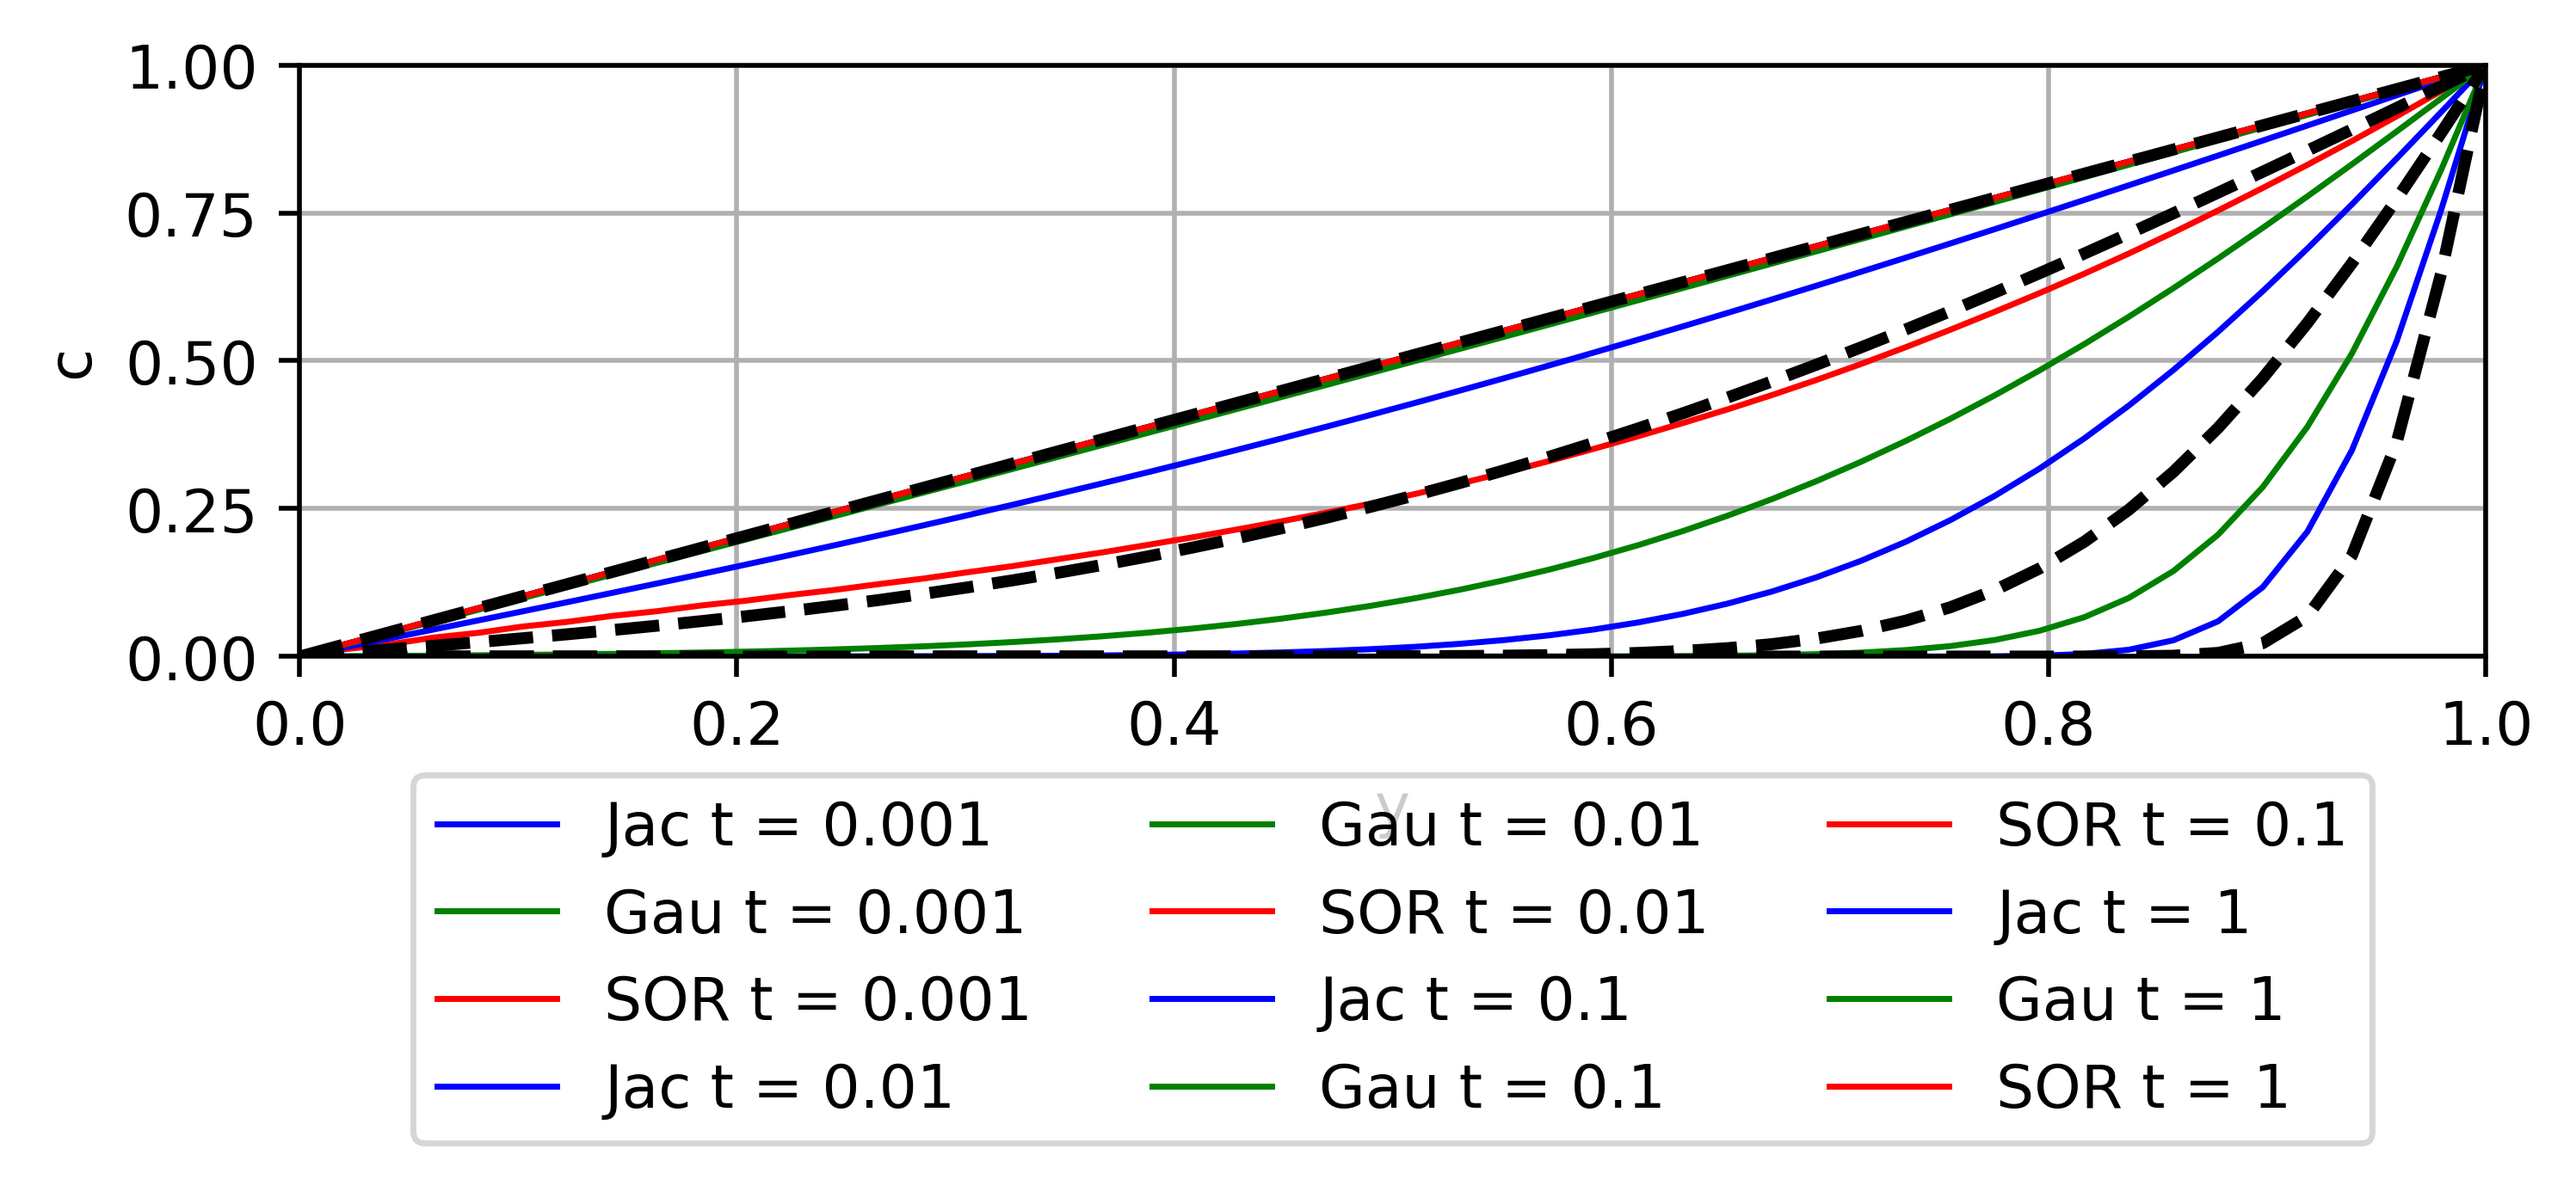

In [111]:
# Repliate Figure 2 of the assignment
plt.figure(figsize=(6,3),dpi=500)

# For all times of interest
for i in range(len(times)):
    # Simulation
    plt.plot(ys,c_sim_jacobi[get_index(times[i],dt),::-1,int(N/2)],c='blue',linestyle='-',label='Jac t = '+str(times[i]),lw=1)
    plt.plot(ys,c_sim_gaussi[get_index(times[i],dt),::-1,int(N/2)],c='green',linestyle='-',label='Gau t = '+str(times[i]),lw=1)
    plt.plot(ys,c_sim_succor[get_index(times[i],dt),::-1,int(N/2)],c='red',linestyle='-',label='SOR t = '+str(times[i]),lw=1)
    
    # Analytical solution
    plt.plot(ys,cs_anals[i,:],linestyle='--',color='black',lw=2)

# Aesthetics
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('y')
plt.ylabel('c')

plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15),ncol=3)
plt.tight_layout()
plt.show()

### I. Show how the convergence measure δ in eq. (14) depends on the number of iterations k for each of the methods

In [101]:
# Set the epsilon value
EPSILON = 0.0001

In [18]:
# Use the previous simulations
c_sim_jacobi = np.load('c_sim_jacobi.npy')
c_sim_gaussi = np.load('c_sim_gaussi.npy')
c_sim_succor = np.load('c_sim_succor.npy')

In [102]:
# Convergence
def is_convergence_reached(c,c_k,epsilon):
    return True if np.max(np.abs(c - c_k)) < epsilon else False

In [103]:
# Compute the max cell difference from pervious timestep
# For all methods
max_jacobi = np.zeros(c_sim_jacobi.shape[0]-1)
max_gaussi = np.zeros(c_sim_gaussi.shape[0]-1)
max_succor = np.zeros(c_sim_succor.shape[0]-1)

for i in range(c_sim_jacobi.shape[0]-1):
    max_jacobi[i] = np.max(np.abs(c_sim_jacobi[i+1,:,:] - c_sim_jacobi[i,:,:]))
    max_gaussi[i] = np.max(np.abs(c_sim_gaussi[i+1,:,:] - c_sim_gaussi[i,:,:]))
    max_succor[i] = np.max(np.abs(c_sim_succor[i+1,:,:] - c_sim_succor[i,:,:]))


In [89]:
print()

(79999,)


In [10]:
max_jacobi.shape
print(max_jacobi)

[1.25000000e-01 7.81250000e-02 5.46875000e-02 ... 7.74325049e-13
 7.73492381e-13 7.72770736e-13]


In [110]:
SYS_EPSILON = sys.float_info.epsilon
print(SYS_EPSILON)

2.220446049250313e-16


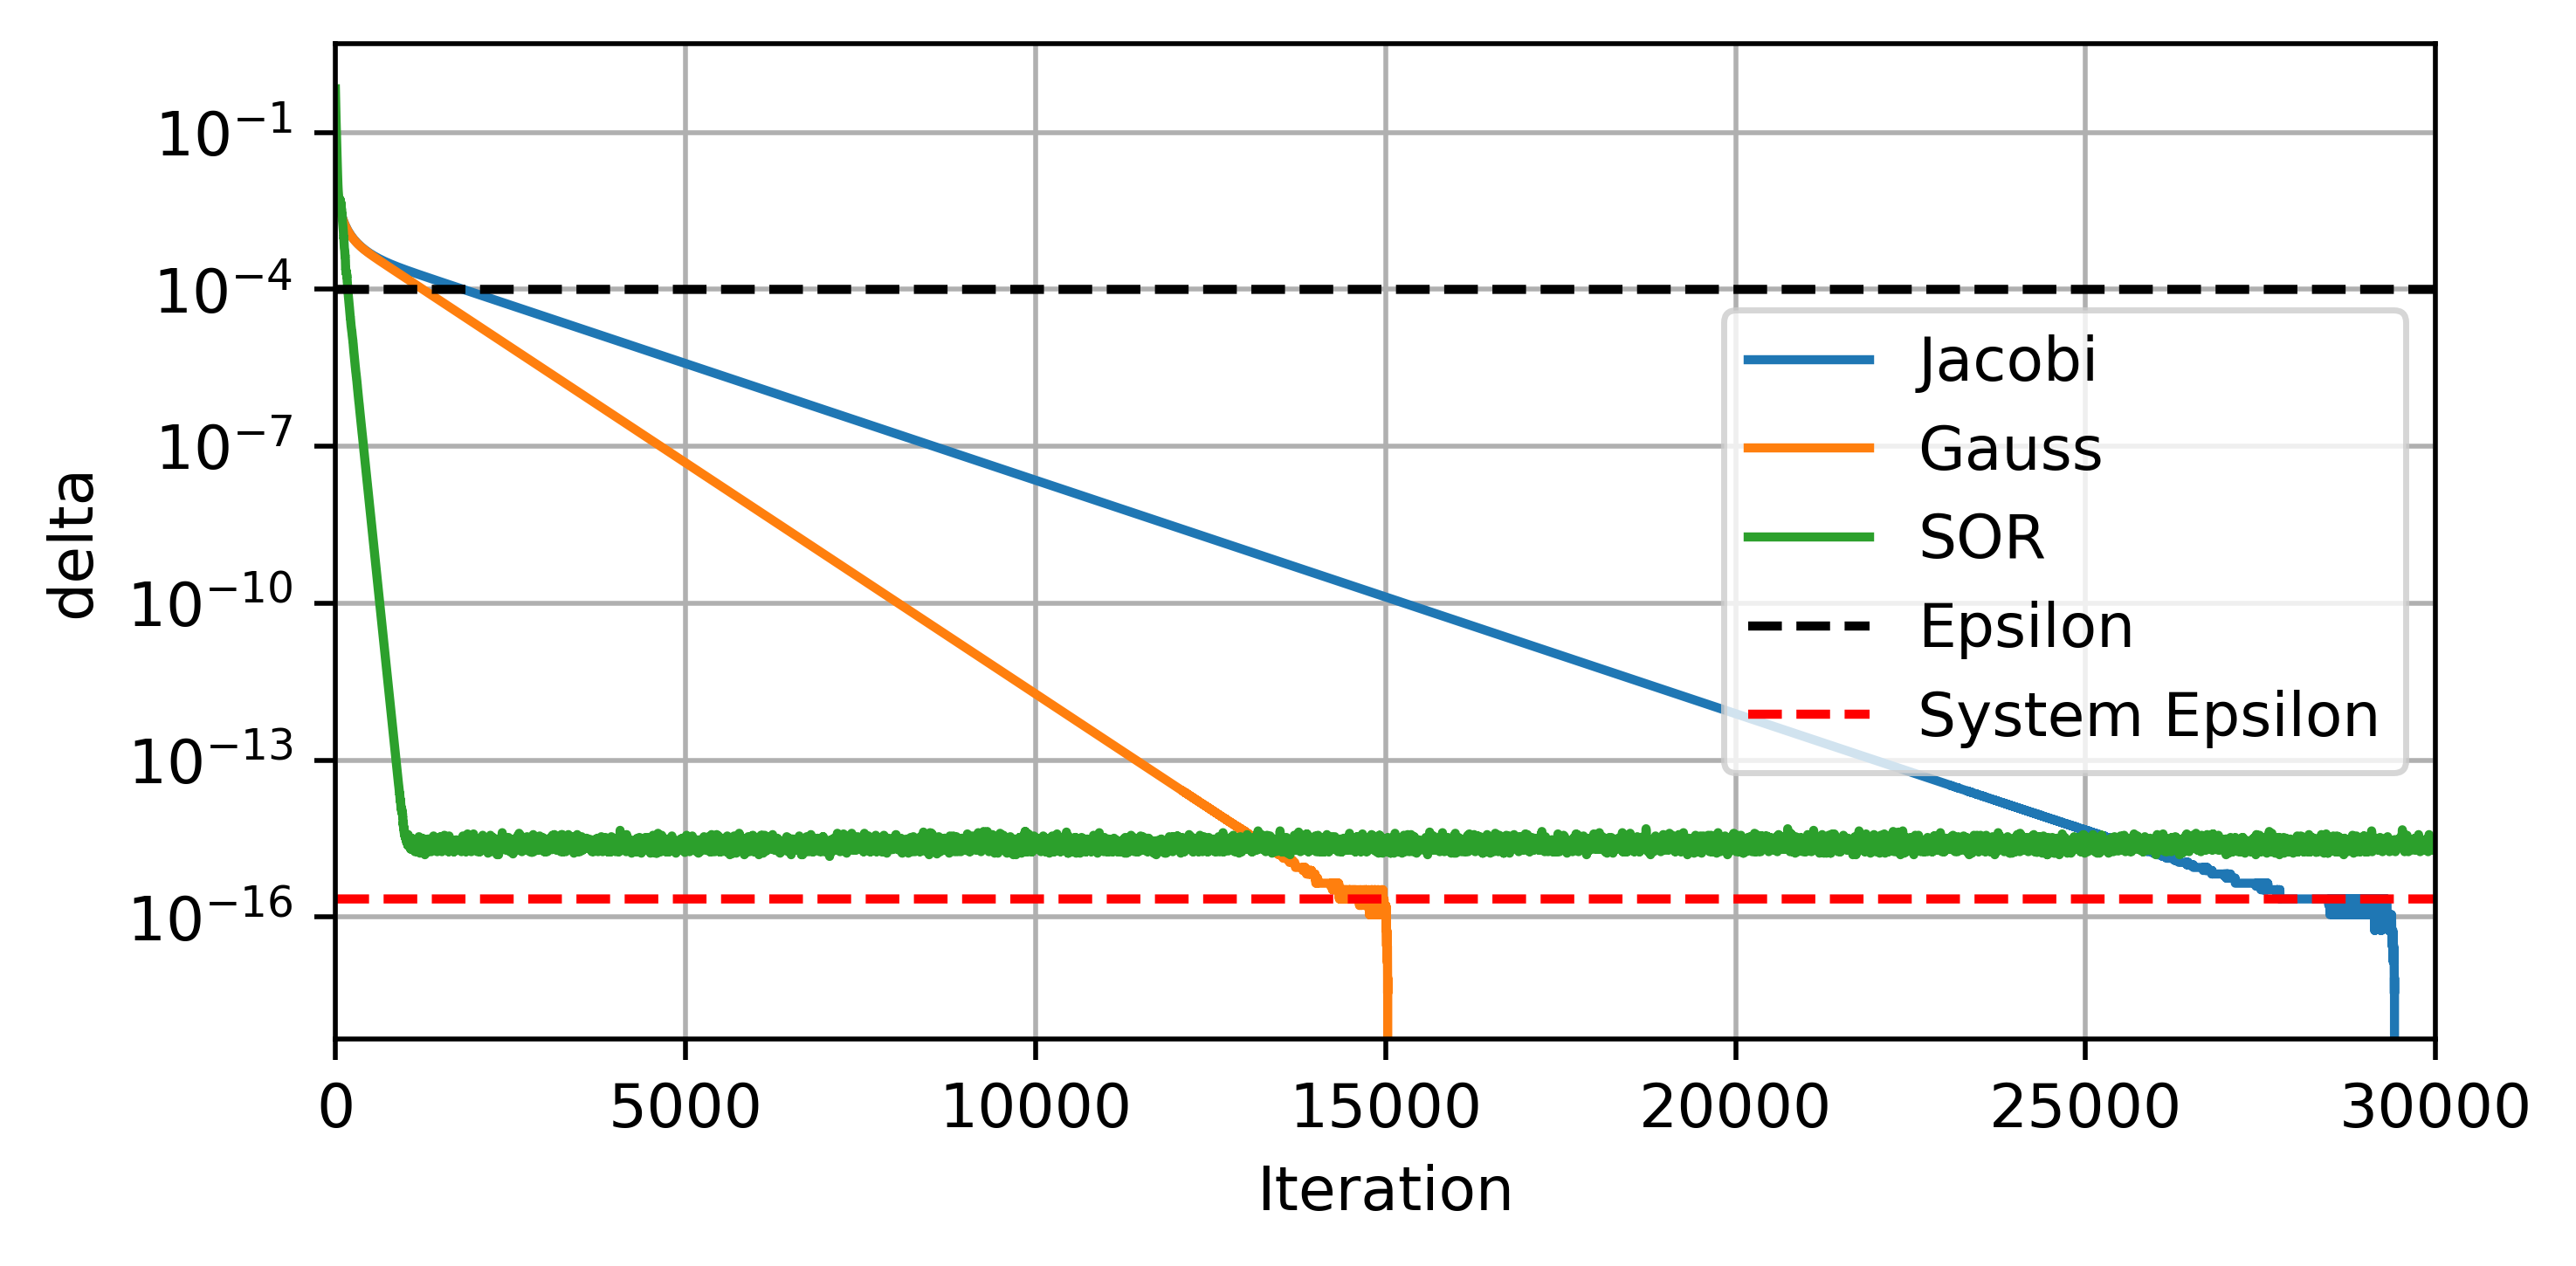

In [108]:
import sys

print()

SYS_EPSILON = sys.float_info.epsilon

length_sim = max_jacobi.shape[0]
xs = np.arange(length_sim)

plt.figure(figsize=(6,3),dpi=500)
plt.semilogy(xs,max_jacobi,label='Jacobi')
plt.semilogy(xs,max_gaussi,label='Gauss')
plt.semilogy(xs,max_succor,label=f'SOR')

plt.semilogy(xs,np.ones(length_sim)*EPSILON,label='Epsilon',c='black',ls='--')
plt.semilogy(xs,np.ones(length_sim)*SYS_EPSILON,label='System Epsilon',c='red',ls='--')


plt.xlabel('Iteration')
plt.ylabel('delta')

plt.legend()
plt.xlim([0,30000])
#plt.ylim([0,1])
plt.tight_layout()
plt.grid()

2.220446049250313e-16

### J. Find the optimal w of SOC. How does the optimal w value depend on N?

In [44]:
# Analytical formula
optimal_w = 2/(1+np.sin(np.pi/(N+1)))
print(optimal_w)

1.8840181363533082


In [47]:
optimal_w2 = 2/(1+np.sin(np.pi/(10+1)))
print(optimal_w2)

1.5603879212747742


### K. Add sinks to the domain

In [49]:
def square_sink_mask(side,ox,oy,N):
    # Returns a matrix of same size as grid, full of zeros
    # And with 1s in the points that are sinks
    mask = np.zeros((N,N))
    mask[ox:ox+side,oy:oy+side] = 1
    return mask

def rectangle_insulating_mask(w,h,ox,oy,N):
    mask = np.zeros((N,N))
    mask[ox:ox+w,oy:oy+h] = 1
    return mask

In [50]:


def are_neighboors_insulating(insulating_mask,i,j,N):

    # insulating_mask
    are_they_insulating = np.zeros(4)

    # First neighboor, in i+1,j
    are_they_insulating[0] = insulating_mask[i+1,j] if is_point_in_bounds(insulating_mask,i+1,j) else insulating_mask[0,j]
    # Second, in i-1,j
    are_they_insulating[1] = insulating_mask[i-1,j] if is_point_in_bounds(insulating_mask,i-1,j) else insulating_mask[N-1,j]
    # Third, in i,j+1
    are_they_insulating[2] = insulating_mask[i,j+1] if is_point_in_bounds(insulating_mask,i,j+1) else insulating_mask[i,0]
    # Fourth, in i,j-1
    are_they_insulating[3] = insulating_mask[i,j-1] if is_point_in_bounds(insulating_mask,i,j-1) else insulating_mask[i,N-1]

    return are_they_insulating

def insulated_contributions(c1,c2,c3,c4,insulating_mask,c,c_k,i,j):
    n1 = c_k[i+1,j] if c1 != 0 else 0
    n2 = c[i,j]  if c2 != 0 else 0
    n3 = c_k[i,j] if c3 != 0 else 0
    n4 = c[i,j] if c4 != 0 else 0
    return n1,n2,n3,n4


# Update the SOR function to have sinks and insulating materials
def update_sor_updated(c,N,w,sink_mask,insulating_mask):
    c_k = c.copy()

    for i,j in np.ndindex(c.shape):
        # If point is in sink or insulating material, it has zero
        if sink_mask[i,j] == 1 or insulating_mask[i,j] == 1:
            c[i,j] = 0
        elif i==0:
            c[i,j] = 1
        elif i==(N-1):             
            c[i,j] = 0
        else:
            # Other cases
            c1,_,c3,_ = get_neighboors(c_k,i,j,N)
            # Values at i-1 and j-1 are used as soon as they are calculated
            # So we take them from c already!
            _,c2,_,c4 = get_neighboors(c,i,j,N)

            # Get how many neighboors are insulating
            insulated_neighboors = np.sum(are_neighboors_insulating(insulating_mask,i,j,N))
            
            # Insulated terms
            # TODO: Get new c for c2 and c4, instead of c_k
            insulated_contributions = insulated_neighboors*c[i,j] #get_insulated_contributions(c1,c2,c3,c4)
            #insulated_neighboors * c[i,j]
            
            #if insulated_neighboors > 0:
            #    print(insulated_neighboors,insulated_contributions)
            
            # Points in insulating material return c value of 0
            # While we compensate by using the value of our cell instead
            # As many times as neighbors in insulating material

            # To do the insulation, what we need to do is see how may neighboors
            # Are in the insulating material, and count our point as many times we are
            # crashing against the insulating material

            c[i,j] = (w/4)*(c1+c2+c3+c4+insulated_contributions) + (1-w)*c_k[i,j]
    return c


In [51]:
# Simulate! Test it!
XMAX,YMAX = 1,1
N = 50 # Must be 50 because of the assignment
MAX_TIME = 5 #5 # Max time we allow to run
dt = 0.001 #0.00005


# Define sink and insulating material
#sink_mask = np.zeros((N,N))  
sink_mask = square_sink_mask(side=4,ox=8,oy=23,N=N)

#plt.imshow(sink_mask)
#plt.title('Sink mask')

insulating_mask = rectangle_insulating_mask(w=5,h=30,ox=30,oy=10,N=N)

#plt.imshow(insulating_mask)
#plt.title('Insulating material mask')

W = 1.8

# Ensure our parameters create a stable solution
#assert is_solution_stable(D,dt,dx), f'Solution is not stable, check your parameters!'

# Create grid
c = start_grid(N)

# Time vector
t_vector = np.linspace(0,MAX_TIME,int(MAX_TIME/dt))

# Create matrices for the simulations
c_sim_succor = np.zeros((t_vector.size,N,N))

In [52]:
# Test functions here
for t in range(int(MAX_TIME/dt)):
    c = update_sor_updated(c,N,W,sink_mask,insulating_mask)
    c_sim_succor[t,:,:] = c

KeyboardInterrupt: 

In [275]:
np.save('c_sim_succor_sink_insulating.npy',c_sim_succor)

In [53]:
c_sim_succor = np.load('c_sim_succor_sink_insulating.npy')

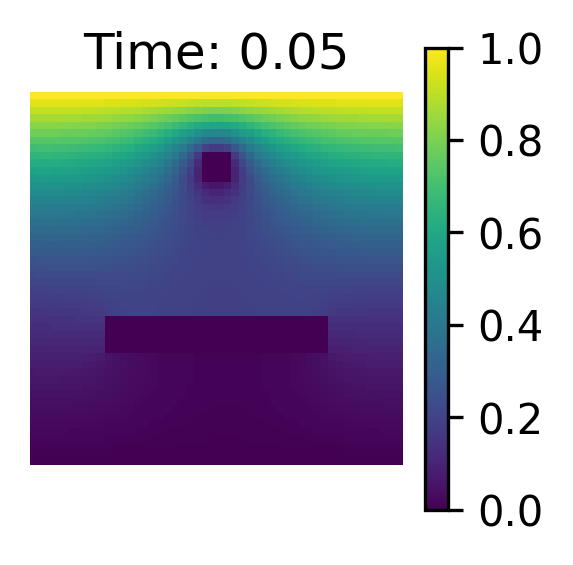

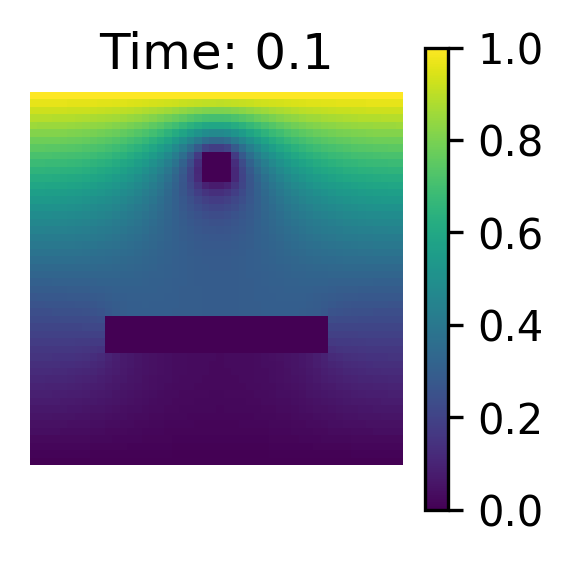

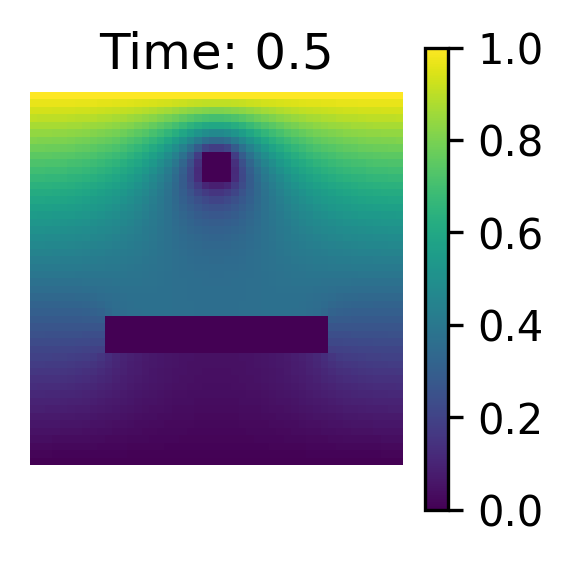

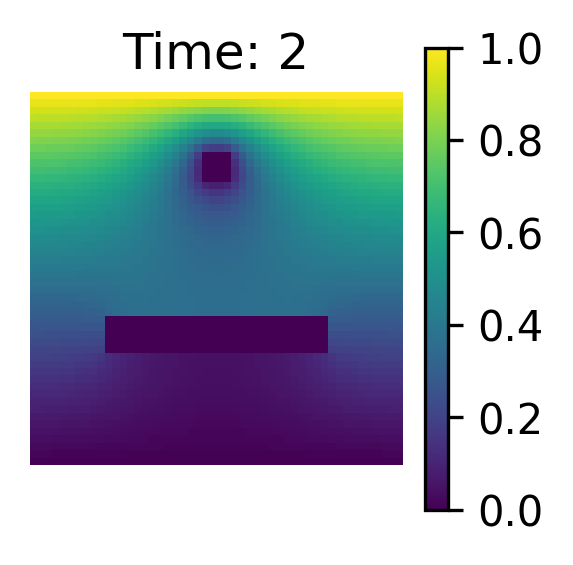

In [67]:
# Print evolution
times = [0.05,0.1,0.5,2]

# Get system at desired times
for i in range(len(times)):
    time = times[i]
    sim = c_sim_succor[get_index(time,dt),:,:]
    plt.figure(figsize=(2,2),dpi=300)

    plt.clf()
    plt.imshow(sim, vmin=0, vmax=1,cmap='viridis')
    plt.axis(False)
    plt.grid(True)
    plt.title('Time: '+str(time))
    plt.colorbar()

KeyboardInterrupt: 

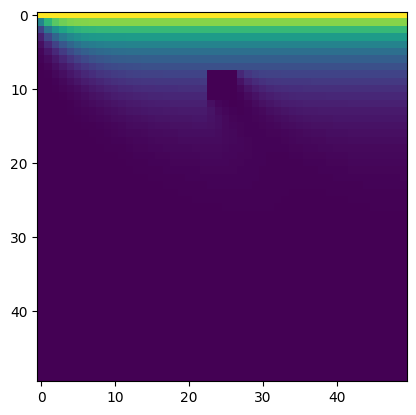

In [58]:
# Do animation
fig, ax = plt.subplots()

def update(frame):
    # Update data stored
    data = c_sim_succor[frame,:,:]
    plt.imshow(data, vmin=0, vmax=1)
    #plt.colorbar()
    # Update plot
    return plt

frames = c_sim_succor.shape[0]
ani = animation.FuncAnimation(fig=fig,func=update,frames=frames,interval=10)

#writergif = animation.PillowWriter(fps=120)

ani.save('test_sink.mp4', dpi=300, writer='ffmpeg')

## Optional: Incorporate insulating material

In [ ]:
# Concentration 0 but not considered for computations
# Create 2D matrix of points that are insulating material
# Update the function to ignore points of that grid when computing concentrations!

